The accuracy score of training dataset with adam is : 0.9779951100244498.
The accuracy score of testing dataset with adam is : 0.948905109489051.

The accuracy score of training dataset with sgd is : 0.9779951100244498.
The accuracy score of testing dataset with sgd is : 0.9416058394160584.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


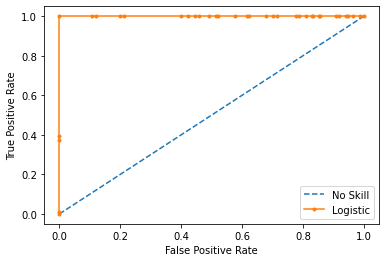

In [154]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from numpy import *
from numpy import array
from numpy import argmax

from sklearn import datasets 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

import random

from sklearn.metrics import roc_curve, auc


def read_data(normalise, run_num):
    # Read data
    data = pd.read_csv("data/BCW.data", delimiter=",", header=None)
    # Remove all rows with missing data, in here variable 6 has missing values
    data = data.values
    
    # N is the number of variables
    N = 11
    for i in range(N):
        data = data[ data[:,6] != '?' ]
        data = data[ data[:,6] != '$' ]
    
    # find features and target
    data_inputx = data[:,1:-1].astype(float)
    data_inputy = data[:,-1].astype(int)
    
    if normalise == True:
        # Min Max Scaler to get [0, 1]
        #scaler = StandardScaler().fit(data_inputx)
        scaler = MinMaxScaler().fit(data_inputx)
        data_inputx = scaler.transform(data_inputx)

    # create csv file with normalised inputs
    data[:,1:-1] = data_inputx
    names = ['Variable_'+str(i+1) for i in range(11)]
    df = pd.DataFrame(data, columns = names)
    #df.to_csv('file_name.csv', index = False)
    '''
    If you getUnicodeEncodeError , simply add encoding='utf-8' ;
    df.to_csv('file_name.csv', encoding='utf-8')
    '''
    
    # One Hot Encoding target 
    data_inputy = pd.get_dummies(data_inputy)
    
    #df = pd.concat([df, pd.get_dummies(df['color'], prefix='color', dummy_na=True)], axis=1)
    df = pd.concat([df[names[0:-1]], pd.get_dummies(df[names[-1]].astype(float), prefix=names[-1])], axis=1)
    df.to_csv('data.csv', index = False)

    return data_inputx, data_inputy

def nn_adam(x_train, x_test, y_train, y_test, num):
    
    hiddens = (10,)
    learn_rate = 0.001
    alphas = 0.0001
    solver = 'adam'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=2000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)

    y_pred_train = nn.predict(x_train)
    y_pred_test = nn.predict(x_test)
    
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    
    return acc_train, acc_test

def nn_sgd(x_train, x_test, y_train, y_test, num):
    
    hiddens = (10,)
    learn_rate = 0.001
    alphas = 0.0001
    solver = 'sgd'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=2000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)

    y_pred_train = nn.predict(x_train)
    y_pred_test = nn.predict(x_test)
    
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    
    return acc_train, acc_test

    
def main():
    run_num = 0
    normalise = True
    data_inputx, data_inputy = read_data(normalise, run_num)
    
    percent_test = 0.4
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=run_num)

    # N is the number of experiments
    N = 1;
    
    # ADAM
    train = np.zeros((N,1))
    test = np.zeros((N,1))
    
    for i in range(N):
        train[i], test[i] = nn_adam(x_train, x_test, y_train, y_test, i)
    
    average_train = np.mean(train)#, axis = 0)
    average_test = np.mean(test)#, axis = 0)
    print("The accuracy score of training dataset with adam is : {}.".format(average_train))
    print("The accuracy score of testing dataset with adam is : {}.\n".format(average_test))
    

    # SGD
    train = np.zeros((N,1))
    test = np.zeros((N,1))
    
    for i in range(N):
        train[i], test[i] = nn_sgd(x_train, x_test, y_train, y_test, i)
    
    average_train = np.mean(train)#, axis = 0)
    average_test = np.mean(test)#, axis = 0)
    print("The accuracy score of training dataset with sgd is : {}.".format(average_train))
    print("The accuracy score of testing dataset with sgd is : {}.\n".format(average_test))
    
    
    
    # best hyper-parameter
    num = 0
    hiddens = (10,)
    learn_rate = 0.001
    alphas = 0.0001
    solver= 'adam'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=1000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)
    y_pred_test = nn.predict(x_test)
    
    '''
    # plot confusion matrix and ROC/AUC curve
    results = confusion_matrix(np.asarray(y_test).argmax(axis=1), y_pred_test.argmax(axis=1))#, labels = [1,2])
    
    # source : https://edstem.org/au/courses/13855/lessons/41909/slides/289271
    def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        import itertools
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig('cmat.png')

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(results, classes=[1,2],
                          title='Confusion matrix')
    
    '''
    

    
    
    
    # source : https://edstem.org/au/courses/13855/lessons/41909/slides/289272
    ns_probs = [0 for _ in range(len(np.asarray(y_test).argmax(axis=1)))]
    lr_probs = nn.predict_proba(x_test)
    
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_pred_test.argmax(axis=1), ns_probs)
    lr_auc = roc_auc_score(y_pred_test.argmax(axis=1), lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_pred_test.argmax(axis=1), ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_pred_test.argmax(axis=1), lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.savefig('ROC.png')

if __name__ == '__main__':
    main()